In [1]:
import os 
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
import pmdarima
from pmdarima import auto_arima
import numpy as np

In [2]:
os.chdir("D:/Imarticus/Time Series And Deep Learning")
rv=pd.read_csv("D:/Imarticus/Time Series And Deep Learning/RestaurantVisitors.csv", index_col='date',parse_dates=True)

In [65]:
# To get all the column and row to display without getting ......
#pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)

In [66]:
rv.head()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65.0,25.0,67.0,139.0,296.0
2016-01-02,Saturday,0,na,24.0,39.0,43.0,85.0,191.0
2016-01-03,Sunday,0,na,24.0,31.0,66.0,81.0,202.0
2016-01-04,Monday,0,na,23.0,18.0,32.0,32.0,105.0
2016-01-05,Tuesday,0,na,2.0,15.0,38.0,43.0,98.0


In [67]:
rv.isnull().sum()

weekday         0
holiday         0
holiday_name    0
rest1           0
rest2           0
rest3           0
rest4           0
total           0
dtype: int64

In [68]:
rv=rv.dropna()

In [69]:
rv.shape

(478, 8)

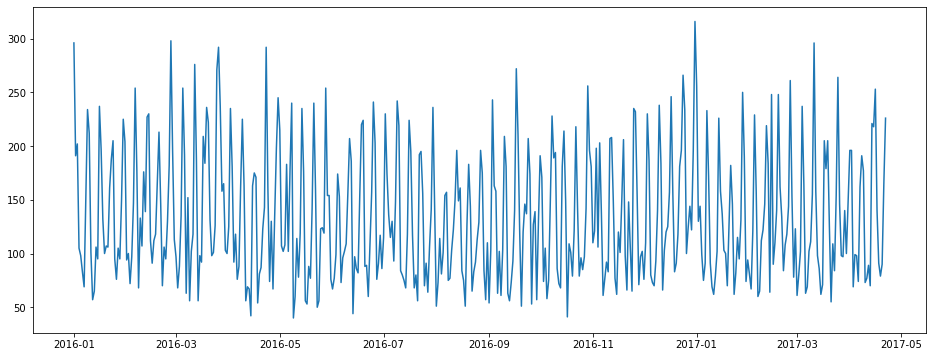

In [70]:
plt.figure(figsize=(16,6))
plt.plot(rv.total)

#### Data already seems to be stationary.

In [71]:
rv[rv['holiday']==1].index # To get the index position of holidays only.. 

DatetimeIndex(['2016-01-01', '2016-01-18', '2016-02-02', '2016-02-14',
               '2016-02-15', '2016-03-17', '2016-03-25', '2016-03-27',
               '2016-03-28', '2016-05-05', '2016-05-08', '2016-05-30',
               '2016-06-19', '2016-07-04', '2016-09-05', '2016-10-10',
               '2016-10-31', '2016-11-11', '2016-11-24', '2016-11-25',
               '2016-12-24', '2016-12-25', '2016-12-31', '2017-01-01',
               '2017-01-16', '2017-02-02', '2017-02-14', '2017-02-20',
               '2017-03-17', '2017-04-14', '2017-04-16', '2017-04-17'],
              dtype='datetime64[ns]', name='date', freq=None)

In [72]:
rv.holiday.head(50)

date
2016-01-01    1
2016-01-02    0
2016-01-03    0
2016-01-04    0
2016-01-05    0
2016-01-06    0
2016-01-07    0
2016-01-08    0
2016-01-09    0
2016-01-10    0
2016-01-11    0
2016-01-12    0
2016-01-13    0
2016-01-14    0
2016-01-15    0
2016-01-16    0
2016-01-17    0
2016-01-18    1
2016-01-19    0
2016-01-20    0
2016-01-21    0
2016-01-22    0
2016-01-23    0
2016-01-24    0
2016-01-25    0
2016-01-26    0
2016-01-27    0
2016-01-28    0
2016-01-29    0
2016-01-30    0
2016-01-31    0
2016-02-01    0
2016-02-02    1
2016-02-03    0
2016-02-04    0
2016-02-05    0
2016-02-06    0
2016-02-07    0
2016-02-08    0
2016-02-09    0
2016-02-10    0
2016-02-11    0
2016-02-12    0
2016-02-13    0
2016-02-14    1
2016-02-15    1
2016-02-16    0
2016-02-17    0
2016-02-18    0
2016-02-19    0
Name: holiday, dtype: int64

In [73]:
index_pos=rv[rv['holiday']==1].index

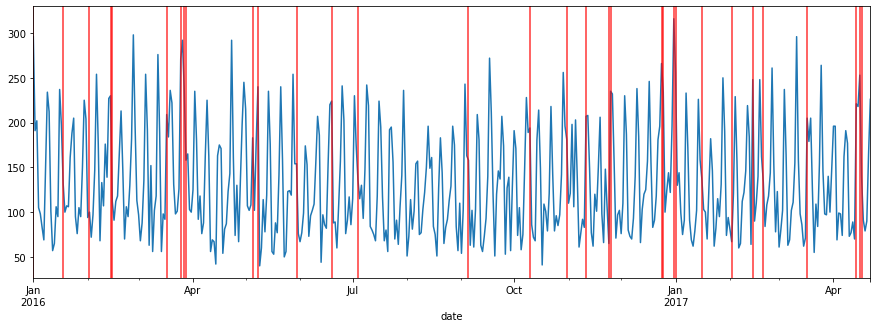

In [74]:
ax=rv['total'].plot(figsize=(15,5))
for day in index_pos:
     ax.axvline(x=day,color="red",alpha=.8)

<h3><font color='red'> Can clearly see the peak conciding with the holidays in the above graph</font><h3>

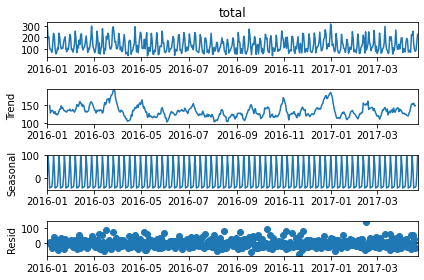

In [75]:
from statsmodels.tsa.seasonal import seasonal_decompose
rv_seasonal=seasonal_decompose(rv['total'])
rv_seasonal.plot();

## Train & Test

In [76]:
train_rv=rv.iloc[0:450]  # 1st 450 in train
test_rv=rv.iloc[450:479]  # Last few records in test

In [77]:
train_rv

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65.0,25.0,67.0,139.0,296.0
2016-01-02,Saturday,0,na,24.0,39.0,43.0,85.0,191.0
2016-01-03,Sunday,0,na,24.0,31.0,66.0,81.0,202.0
2016-01-04,Monday,0,na,23.0,18.0,32.0,32.0,105.0
2016-01-05,Tuesday,0,na,2.0,15.0,38.0,43.0,98.0
2016-01-06,Wednesday,0,na,9.0,11.0,22.0,41.0,83.0
2016-01-07,Thursday,0,na,15.0,6.0,18.0,30.0,69.0
2016-01-08,Friday,0,na,79.0,32.0,22.0,16.0,149.0
2016-01-09,Saturday,0,na,44.0,44.0,47.0,99.0,234.0


In [78]:
test_rv

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-03-26,Sunday,0,na,33.0,27.0,48.0,38.0,146.0
2017-03-27,Monday,0,na,26.0,31.0,34.0,7.0,98.0
2017-03-28,Tuesday,0,na,21.0,25.0,20.0,31.0,97.0
2017-03-29,Wednesday,0,na,39.0,40.0,22.0,39.0,140.0
2017-03-30,Thursday,0,na,36.0,22.0,13.0,29.0,100.0
2017-03-31,Friday,0,na,49.0,52.0,28.0,20.0,149.0
2017-04-01,Saturday,0,na,67.0,31.0,36.0,62.0,196.0
2017-04-02,Sunday,0,na,69.0,21.0,55.0,51.0,196.0
2017-04-03,Monday,0,na,24.0,2.0,29.0,14.0,69.0


In [79]:
auto_arima(rv['total'], seasonal= True ,m=7)

ARIMA(order=(0, 0, 0), scoring_args={}, seasonal_order=(1, 0, 1, 7),
      suppress_warnings=True)

In [80]:
model_sarima=SARIMAX(rv['total'],order=(0,0,0),seasonal_order=(1, 0, 1, 7))
results= model_sarima.fit() # Model has been Created.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [81]:
pred_rv=results.predict(start=450,end=477)
pred_rv

2017-03-26    175.261684
2017-03-27     90.532112
2017-03-28     95.253485
2017-03-29     95.235283
2017-03-30     97.298736
2017-03-31    145.544741
2017-04-01    231.685444
2017-04-02    174.120515
2017-04-03     90.818096
2017-04-04     95.317491
2017-04-05     96.966937
2017-04-06     97.399674
2017-04-07    145.672907
2017-04-08    230.294376
2017-04-09    174.961128
2017-04-10     89.969571
2017-04-11     95.456409
2017-04-12     97.003181
2017-04-13     96.489640
2017-04-14    146.299029
2017-04-15    228.764929
2017-04-16    175.033226
2017-04-17     89.309436
2017-04-18     94.738528
2017-04-19     96.689729
2017-04-20     95.460871
2017-04-21    149.181561
2017-04-22    228.339831
Freq: D, Name: predicted_mean, dtype: float64

In [82]:
len(pred_rv)

28

In [83]:
test_rv.shape

(28, 8)

In [84]:
test_rv[test_rv['holiday']==1].index # Holiday index only for test

DatetimeIndex(['2017-04-14', '2017-04-16', '2017-04-17'], dtype='datetime64[ns]', name='date', freq=None)

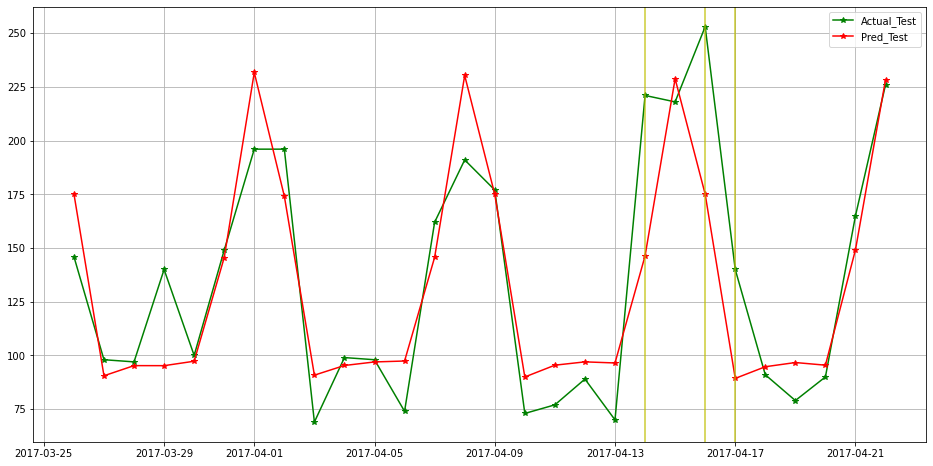

In [85]:
plt.figure(figsize=(16,8))
plt.plot(test_rv.total,marker="*",color="g",label="Actual_Test")
plt.plot(pred_rv,color="r",label="Pred_Test",marker="*")
plt.legend()
plt.grid()
plt.axvline(x='2017-04-14',color="y",alpha=.8)
plt.axvline(x='2017-04-16',color="y",alpha=.8)
plt.axvline(x='2017-04-17',color="y",alpha=.8)

In [86]:
error=test_rv.total-pred_rv
error

date
2017-03-26   -29.261684
2017-03-27     7.467888
2017-03-28     1.746515
2017-03-29    44.764717
2017-03-30     2.701264
2017-03-31     3.455259
2017-04-01   -35.685444
2017-04-02    21.879485
2017-04-03   -21.818096
2017-04-04     3.682509
2017-04-05     1.033063
2017-04-06   -23.399674
2017-04-07    16.327093
2017-04-08   -39.294376
2017-04-09     2.038872
2017-04-10   -16.969571
2017-04-11   -18.456409
2017-04-12    -8.003181
2017-04-13   -26.489640
2017-04-14    74.700971
2017-04-15   -10.764929
2017-04-16    77.966774
2017-04-17    50.690564
2017-04-18    -3.738528
2017-04-19   -17.689729
2017-04-20    -5.460871
2017-04-21    15.818439
2017-04-22    -2.339831
dtype: float64

In [87]:
MSE = np.mean(np.square(error))
MSE

853.3776557447142

In [88]:
from sklearn.metrics import mean_squared_error,r2_score
from math import sqrt
mse=mean_squared_error(test_rv.total,pred_rv)

r_sqaured = r2_score(test_rv.total,pred_rv)

rmse=sqrt(mse)

In [89]:
print('Mean_Squared_Error:',mse)
print('Root_Mean_Sqaured_Erro:',rmse)
print('r_sqaure_value:',r_sqaured)

Mean_Squared_Error: 853.3776557447138
Root_Mean_Sqaured_Erro: 29.212628360774282
r_sqaure_value: 0.7229724689602999


### till this point only sarima is used X was not used

In [134]:
auto_arima(rv['total'],seasonal=True,m=7,exogenous=rv[['holiday']])

# exogenous data frame format because more than 1 cols can be taken as x

#exogenous =rv.holiday

ARIMA(order=(1, 0, 0), scoring_args={}, seasonal_order=(1, 0, 1, 7),
      suppress_warnings=True)

In [115]:
rv[['holiday']]

,holiday
date,
2016-01-01,1
2016-01-02,0
2016-01-03,0
2016-01-04,0
2016-01-05,0
2016-01-06,0
2016-01-07,0
2016-01-08,0
2016-01-09,0


In [118]:
model2=SARIMAX(rv['total'],order=(1,0,0),seasonal_order=(1,0,1,7),X=train_rv[['holiday']])

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [119]:
results1= model2.fit()

In [120]:
pred_val=results1.predict()

In [121]:
pred_val

2016-01-01      0.000000
2016-01-02     52.862305
2016-01-03     34.153445
2016-01-04     36.340998
2016-01-05     20.271520
2016-01-06     26.014982
2016-01-07     62.239957
2016-01-08    276.839610
2016-01-09    155.595783
2016-01-10    198.560851
2016-01-11    102.290349
2016-01-12     92.449033
2016-01-13     73.674553
2016-01-14     75.298135
2016-01-15    218.688134
2016-01-16    183.832247
2016-01-17    205.585804
2016-01-18     99.003773
2016-01-19     80.955471
2016-01-20     77.736720
2016-01-21    100.847805
2016-01-22    177.485715
2016-01-23    212.962131
2016-01-24    194.026244
2016-01-25    111.199723
2016-01-26     80.568244
2016-01-27     83.035907
2016-01-28    102.376759
2016-01-29    171.440897
2016-01-30    204.827237
2016-01-31    203.333975
2016-02-01    107.019768
2016-02-02     79.264747
2016-02-03     92.772035
2016-02-04     94.851143
2016-02-05    167.500480
2016-02-06    208.294140
2016-02-07    208.636696
2016-02-08     99.606839
2016-02-09     78.745972


In [122]:
# agin find the mse and compare with previous mse

In [123]:
pred_rv_exog=results1.predict(start=450,end=477,exog=test_rv[['holiday']])## exog it g
pred_rv_exog

2017-03-26    181.431407
2017-03-27     85.231864
2017-03-28     96.472563
2017-03-29     95.501100
2017-03-30    105.552567
2017-03-31    145.979018
2017-04-01    232.022502
2017-04-02    167.965807
2017-04-03     94.631485
2017-04-04     91.310037
2017-04-05     97.508285
2017-04-06     97.842691
2017-04-07    141.442465
2017-04-08    232.996270
2017-04-09    168.107224
2017-04-10     90.284322
2017-04-11     92.305863
2017-04-12     93.594265
2017-04-13     95.346402
2017-04-14    141.484494
2017-04-15    241.963715
2017-04-16    173.251511
2017-04-17    103.210935
2017-04-18    103.697784
2017-04-19     95.919685
2017-04-20     92.616408
2017-04-21    147.995479
2017-04-22    231.066520
Freq: D, Name: predicted_mean, dtype: float64

In [124]:
err_xg=test_rv['total']-pred_rv_exog

In [125]:
err_xg

date
2017-03-26   -35.431407
2017-03-27    12.768136
2017-03-28     0.527437
2017-03-29    44.498900
2017-03-30    -5.552567
2017-03-31     3.020982
2017-04-01   -36.022502
2017-04-02    28.034193
2017-04-03   -25.631485
2017-04-04     7.689963
2017-04-05     0.491715
2017-04-06   -23.842691
2017-04-07    20.557535
2017-04-08   -41.996270
2017-04-09     8.892776
2017-04-10   -17.284322
2017-04-11   -15.305863
2017-04-12    -4.594265
2017-04-13   -25.346402
2017-04-14    79.515506
2017-04-15   -23.963715
2017-04-16    79.748489
2017-04-17    36.789065
2017-04-18   -12.697784
2017-04-19   -16.919685
2017-04-20    -2.616408
2017-04-21    17.004521
2017-04-22    -5.066520
dtype: float64

In [126]:
MSE = np.mean(np.square(err_xg))
MSE

916.0183559273217

In [128]:
RMSE=np.sqrt(MSE)
RMSE

30.26579514777898

In [129]:
mse=mean_squared_error(test_rv.total,pred_rv_exog)

r_sqaured = r2_score(test_rv.total,pred_rv_exog)

rmse=sqrt(mse)

In [130]:
print('Mean_Squared_Error:',mse)
print('Root_Mean_Sqaured_Erro:',rmse)
print('r_sqaure_value:',r_sqaured)

Mean_Squared_Error: 916.0183559273219
Root_Mean_Sqaured_Erro: 30.265795147778984
r_sqaure_value: 0.702637745643643


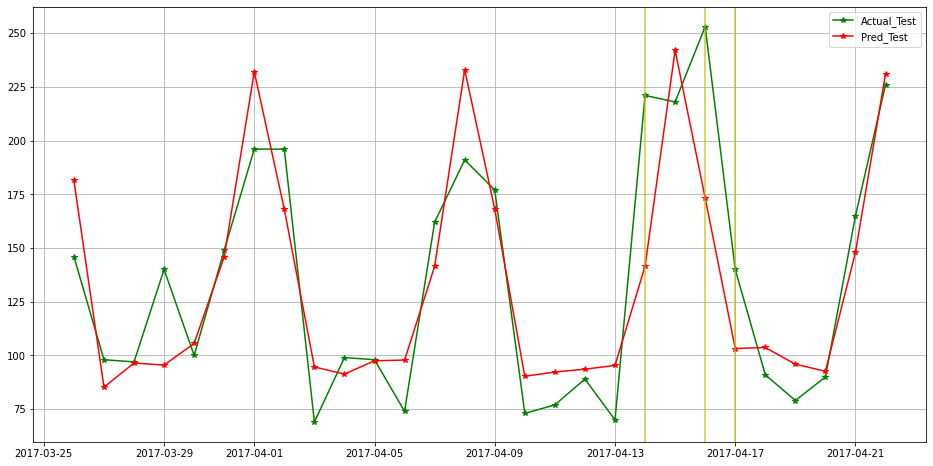

In [131]:
plt.figure(figsize=(16,8))
plt.plot(test_rv.total,marker="*",color="g",label="Actual_Test")
plt.plot(pred_rv_exog,color="r",label="Pred_Test",marker="*")
plt.legend()
plt.grid()
plt.axvline(x='2017-04-14',color="y",alpha=.8)
plt.axvline(x='2017-04-16',color="y",alpha=.8)
plt.axvline(x='2017-04-17',color="y",alpha=.8)